# LeR Short Example

This notebook is created by [Phurailatpam Hemantakumar](https://hemantaph.com)

[![Documentation](https://img.shields.io/badge/ler-documentation-blue)](https://ler.hemantaph.com) 

`ler` is a comprehensive framework for simulating gravitational wave (GW) events and calculating their detection rates, including gravitational lensing effects. 
- The **`LeR`** class is the primary interface for these simulations.
- The **`GWRATES`** class focuses on standard (unlensed) Compact Binary Coalescence (CBC) events. Refer to the **GWRATES complete example** for more details.

This notebook demonstrates how to simulate both lensed and unlensed CBC populations and compare their detection rates using the `LeR` class.

## Table of Contents
- [1. Basic GW Population Simulation and Rate Calculation](#1-basic-gw-population-simulation-and-rate-calculation)
   - [1.1 Initialize LeR](#11-initialize-ler)
   - [1.2 Simulate Unlensed GW Population](#12-simulate-unlensed-gw-population)
   - [1.3 Calculate Unlensed Detection Rates](#13-calculate-unlensed-detection-rates)
   - [1.4 Inspect Generated Parameters](#14-inspect-generated-parameters)
- [2. Lensed GW Population Simulation and Rates](#2-lensed-gw-population-simulation-and-rates)
   - [2.1 Simulate Lensed GW Population](#21-simulate-lensed-gw-population)
   - [2.2 Calculate Lensed Detection Rates](#22-calculate-lensed-detection-rates)
- [3. Rate Comparison and Visualization](#3-rate-comparison-and-visualization)
   - [3.1 Compare Lensed vs Unlensed Rates](#31-compare-lensed-vs-unlensed-rates)
   - [3.2 Access Saved Data Files](#32-access-saved-data-files)
   - [3.3 Visualize Parameter Distributions](#33-visualize-parameter-distributions)
   - [3.4 Explore Available Functions](#34-explore-available-functions)
- [4. Summary](#4-summary)

---

## 1. Basic GW Population Simulation and Rate Calculation

This section demonstrates how to simulate unlensed binary black hole mergers and calculate their detection rates.

### 1.1 Initialize LeR

The `LeR` class is the main interface for simulating gravitational lensing effects on GW events and calculating lensed rates. By default, it uses:
- **Event type:** BBH (Binary Black Hole).
- **Lens galaxy model:** EPL+Shear (Elliptical Power Law galaxy with external shears).
- **Detectors:** H1, L1, V1 (LIGO Hanford, LIGO Livingston, Virgo) with O4 design sensitivity.

All outputs will be saved in the `./ler_data` directory by default.

In [1]:
# Import LeR
from ler import LeR

# Initialize LeR with default settings
ler = LeR?

Init signature:
LeR(
    npool=4,
    z_min=0.0,
    z_max=10.0,
    event_type='BBH',
    lens_type='epl_shear_galaxy',
    cosmology=None,
    pdet_finder=None,
    json_file_names=None,
    interpolator_directory='./interpolator_json',
    create_new_interpolator=False,
    ler_directory='./ler_data',
    verbose=True,
    **kwargs,
)
Docstring:     
Class to sample lensed and unlensed GW events and calculate their detection rates.

This class provides functionality for sampling gravitational wave source parameters,
detection probabilities, and computing detection rates for both lensed and unlensed
compact binary coalescence events.
Parameters of simulated events are stored in JSON files (not as class attributes)
to conserve RAM memory.

Key Features: 

- Sampling of unlensed and lensed CBC event parameters 

- Detection probability calculation using ``gwsnr`` package or custom functions 

- Rate calculation for detectable events 

- Batch processing for memory efficiency 

- JSON-b

- To print all initialization input arguments, use the following command:

```python
    ler._print_all_init_args()
```

- Besides `LeR` settings, this will show the models, functions, and their associated parameters used in the initialization.

### 1.2 Simulate Unlensed GW Population

Generate a population of unlensed Compact Binary Coalescence (CBC) events. This step:
- Samples intrinsic (masses and spins) and extrinsic (redshift, sky location, inclination angle, etc.) GW parameters from initialized priors.
- Calculates the probability of detection (Pdet) for each event based on the detector network sensitivity.
- Stores the output in `./ler_data/unlensed_param.json`.

**Parameters:**
- `size`: Total number of events to sample
- `batch_size`: Events per batch (useful for resuming interrupted simulations)
- `resume`: If `True` (default), resume from last saved batch; if `False`, start fresh
- `save_batch`: If `True`, save after each batch; if `False` (default), save only at the end

**Note:** For realistic results, use `size >= 1,000,000` with `batch_size = 100,000`

In [4]:
# Simulate 100,000 unlensed GW events in batches of 50,000
unlensed_param = ler.unlensed_cbc_statistics()

print(f"\nTotal unlensed events simulated: {len(unlensed_param['zs'])}")
print(f"Sampled source redshift values (first 5): {unlensed_param['zs'][:5]}")

unlensed params will be stored in ./ler_data/unlensed_param.json
resuming from ./ler_data/unlensed_param.json
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all unlensed parameters in ./ler_data/unlensed_param.json 

Total unlensed events simulated: 100000
Sampled source redshift values (first 5): [2.62829567 2.69294624 3.59710326 1.65587917 1.71471783]


### 1.3 Calculate Unlensed Detection Rates

Select detectable events and calculate the detection rate. This function:
- Filters events using a Pdet threshold. By default, Pdet is based on observed SNR > 10, where the observed SNR follows a non-central chi-squared distribution centered at the optimal SNR.
- Returns the rate in detectable events per year.
- Saves detectable events to `./ler_data/unlensed_param_detectable.json`.

In [5]:
# Calculate the detection rate and extract detectable unlensed events
rate_unlensed, unlensed_param_detectable = ler.unlensed_rate()

print(f"\n=== Unlensed Detection Rate Summary ===")
print(f"Detectable event rate: {rate_unlensed:.2e} events per year")
print(f"Total event rate: {ler.normalization_pdf_z:.2e} events per year")
print(f"Percentage fraction of the detectable events: {rate_unlensed/ler.normalization_pdf_z*100:.2e}%")

Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 293.06817255190015
number of simulated unlensed detectable events: 320
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json

=== Unlensed Detection Rate Summary ===
Detectable event rate: 2.93e+02 events per year
Total event rate: 9.16e+04 events per year
Percentage fraction of the detectable events: 3.20e-01%


### 1.4 Inspect Generated Parameters

View the available parameters in the generated event population.

In [6]:
# List all parameters available in the detectable event population
print("Detectable unlensed event parameters:")
print(list(unlensed_param_detectable.keys()))

print("\nExample values for mass_1_source (first 5 events):")
print(unlensed_param_detectable['mass_1_source'][:5])

Detectable unlensed event parameters:
['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net']

Example values for mass_1_source (first 5 events):
[ 8.1198761  30.67318502 74.52308087 32.79112834 12.95563217]


---

## 2. Lensed GW Population Simulation and Rates

This part demonstrates the simulation of lensed GW events and rate calculation. Lensing includes additional parameters such as lens galaxy properties (lens redshift, velocity dispersion, etc.) and image characteristics (magnification, time delays, etc.).

### 2.1 Simulate Lensed GW Population

Generate a population of lensed CBC events including lens galaxy properties and image parameters:
- Source parameters (redshift, masses, spins)
- Lens parameters (redshift, Einstein radius, ellipticity, shear components)
- Image parameters (magnifications, time delays)

This step stores output in `./ler_data/lensed_param.json`

**Note:** The simulation includes:
- Lens galaxy population sampling
- Selection based on lensing cross-section
- Lens equation solving for multiple image generation
- Pdet calculation for each image

In [7]:
# Simulate 100,000 unlensed GW events in batches of 50,000
lensed_param = ler.lensed_cbc_statistics()

print(f"\nTotal lensed events simulated: {len(lensed_param['zs'])}")
print(f"Sampled source redshift values (first 5): {lensed_param['zs'][:5]}")

lensed params will be stored in ./ler_data/lensed_param.json
resuming from ./ler_data/lensed_param.json
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4377.06it/s]


calculating pdet...
Batch no. 2
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4418.68it/s]


calculating pdet...

Total lensed events simulated: 100000
Sampled source redshift values (first 5): [1.74278898 4.52160605 3.78426709 3.63007519 2.1264582 ]


### 2.2 Calculate Lensed Detection Rates

- Calculate the lensed detection rate, requiring at least two detectable images for a valid detection.
- The detection rate is stored in `./ler_data/lensed_param_detectable.json`.

In [8]:
# Calculate the detection rate for lensed events
rate_lensed, lensed_param_detectable = ler.lensed_rate()

print(f"\n=== Lensed Detection Rate Summary ===")
print(f"Detectable event rate: {rate_lensed:.2e} events per year")
print(f"Total event rate: {ler.normalization_pdf_z_lensed:.2e} events per year")
print(f"Percentage fraction of the detectable events: {rate_lensed/ler.normalization_pdf_z_lensed*100:.2e}%")

Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 0.08838424478538758
number of simulated lensed detectable events: 78
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable.json

=== Lensed Detection Rate Summary ===
Detectable event rate: 8.84e-02 events per year
Total event rate: 1.13e+02 events per year
Percentage fraction of the detectable events: 7.80e-02%


In [9]:
# List all parameters available in the detectable lensed event population
print("Detectable lensed event parameters:")
print(list(lensed_param_detectable.keys()))

print("\nLens-specific parameters include:")
lens_params = ['zl', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2']
for param in lens_params:
    if param in lensed_param_detectable:
        print(f"  {param}: {lensed_param_detectable[param][:3]}")

Detectable lensed event parameters:
['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_net', 'L1', 'H1', 'V1']

Lens-specific parameters include:
  zl: [0.54337231 1.87777572 0.64609008]
  sigma: [181.65920777 128.87706255 196.8531673 ]
  theta_E: [2.03764065e-06 6.01901250e-07 2.62310898e-06]
  q: [0.66697535 0.4918578  0.77095448]
  phi: [3.25526037 6.01826202 3.75664554]
  gamma: [1.88747336 2.18793729 2.0281945 ]
  gamma1: [ 0.05469759 -0.06132396 -0.02247388]
  gamma2: [-0.1018271   0.0365925  -0.02447439]


---

## 3. Rate Comparison and Visualization

Compare the lensed and unlensed detection rates, access saved data files, and visualize parameter distributions.

### 3.1 Compare Lensed vs Unlensed Rates

Compare the detection rates and calculate the lensing magnification effect.

In [10]:
# Compare lensed and unlensed rates
rate_ratio = ler.rate_ratio()

print(f"\n=== Rate Comparison ===")
print(f"Unlensed detection rate: {rate_unlensed:.4e} events/yr")
print(f"Lensed detection rate: {rate_lensed:.4e} events/yr")
print(f"Rate ratio (lensed/unlensed): {rate_ratio:.4f}")

unlensed_rate: 293.06817255190015
lensed_rate: 0.08838424478538758
ratio: 3315.8417913002595

=== Rate Comparison ===
Unlensed detection rate: 2.9307e+02 events/yr
Lensed detection rate: 8.8384e-02 events/yr
Rate ratio (lensed/unlensed): 3315.8418


Bonus: The following command simultaneously selects detectable events, calculates rates, and compares unlensed and lensed events.

```python
unlensed_rate, lensed_rate, rate_ratio, unlensed_param_detectable, lensed_param_detectable = ler.rate_comparison_with_rate_calculation()
```


### 3.2 Access Saved Data Files

All simulation results are saved in JSON files for future reference and analysis. View the saved file locations and load parameters from disk.

In [10]:
# View saved file locations and names
print(f"Output directory: {ler.ler_directory}")
print(f"\nSaved JSON files:")
for key, filename in ler.json_file_names.items():
    print(f"  {key}: {filename}")

Output directory: ./ler_data

Saved JSON files:
  ler_params: ler_params.json
  unlensed_param: unlensed_param.json
  unlensed_param_detectable: unlensed_param_detectable.json
  lensed_param: lensed_param.json
  lensed_param_detectable: lensed_param_detectable.json


In [11]:
# Load parameters from saved JSON files
from ler.utils import get_param_from_json, load_json

# Load detectable parameters from files
unlensed_param_from_file = get_param_from_json(
    ler.ler_directory + '/' + ler.json_file_names['unlensed_param_detectable']
)
lensed_param_from_file = get_param_from_json(
    ler.ler_directory + '/' + ler.json_file_names['lensed_param_detectable']
)

print(f"Unlensed parameters loaded: {list(unlensed_param_from_file.keys())}")
print(f"Lensed parameters loaded: {list(lensed_param_from_file.keys())}")

# Load initialization parameters and results
ler_params = load_json(ler.ler_directory + '/ler_params.json')
print(f"\n=== Rates from saved file ===")
print(f"Detectable unlensed rate: {ler_params['detectable_unlensed_rate_per_year']:.4e} events/yr")
print(f"Detectable lensed rate: {ler_params['detectable_lensed_rate_per_year']:.4e} events/yr")
print(f"Rate ratio: {ler_params['rate_ratio']:.4f}")

Unlensed parameters loaded: ['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net']
Lensed parameters loaded: ['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_net', 'L1', 'H1', 'V1']

=== Rates from saved file ===
Detectable unlensed rate: 2.7710e+02 events/yr
Detectable lensed rate: 1.0021e-01 events/yr
Rate ratio: 2765.2057


### 3.3 Visualize Parameter Distributions

Create KDE (Kernel Density Estimation) plots to compare the distributions of source redshift for lensed and unlensed populations.

getting gw_params from json file ler_data/unlensed_param_detectable.json...
getting gw_params from json file ler_data/unlensed_param.json...
getting gw_params from json file ler_data/lensed_param_detectable.json...
getting gw_params from json file ler_data/lensed_param.json...


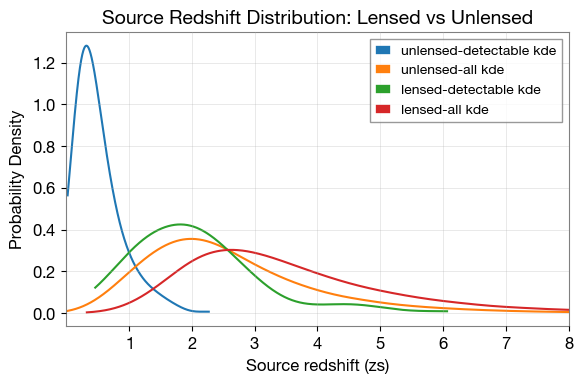

In [13]:
# Visualize parameter distributions
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# Plot source redshift distributions
plt.figure(figsize=(6, 4))

# Unlensed populations
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param_detectable.json', # can also provide the dict directly
    plot_label='unlensed-detectable',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param.json',
    plot_label='unlensed-all',
    histogram=False,
    kde=True,
)

# Lensed populations
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param_detectable.json',
    plot_label='lensed-detectable',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param.json',
    plot_label='lensed-all',
    histogram=False,
    kde=True,
)

plt.xlim(0.001, 8)
plt.grid(alpha=0.4)
plt.xlabel('Source redshift (zs)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Source Redshift Distribution: Lensed vs Unlensed', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

### 3.4 Explore Available Functions and Parameters

Inspect internal functions and parameters that can be used for `LeR` initialization.

In [15]:
# List all available GW prior are in ler.available_gw_prior 
print("# ----------------------------------------------------")
print("# GW prior sampler functions and it's input arguments:")
print("# ----------------------------------------------------\n")
for key, value in ler.available_gw_prior.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

# list all available lens prior are in ler.available_lens_samplers
print("\n# ----------------------------------------------------")
print("# Lens prior sampler functions and it's input arguments:")
print("# ----------------------------------------------------\n")
for key, value in ler.available_lens_samplers.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

# list all available lens functions are in ler.available_lens_functions
print("\n# ----------------------------------------------------")
print("# Other lens related functions and it's input arguments:")
print("# ----------------------------------------------------\n")
for key, value in ler.available_lens_functions.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

# ----------------------------------------------------
# GW prior sampler functions and it's input arguments:
# ----------------------------------------------------

merger_rate_density = dict(
    merger_rate_density_bbh_oguri2018 = {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30},
    sfr_madau_fragos2017 = {'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2},
    sfr_madau_dickinson2014 = {'a': 0.015, 'b': 2.7, 'c': 2.9, 'd': 5.6},
    sfr_with_time_delay = {'R0': 2.39e-08, 'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2, 'td_min': 0.01, 'td_max': 10.0},
    merger_rate_density_bbh_popIII_ken2022 = {'n0': 1.92e-08, 'aIII': 0.66, 'bIII': 0.3, 'zIII': 11.6},
    merger_rate_density_bbh_primordial_ken2022 = {'n0': 4.4e-11, 't0': 13.786885302009708},
    sfr_madau_fragos2017_with_bbh_dt = {'R0': 2.39e-08},
    sfr_madau_dickinson2014_with_bbh_dt = {'R0': 2.39e-08},
    sfr_madau_fragos2017_with_bns_dt = {'R0': 1.0550000000000001e-07},
    sfr_madau_dickinson2014_with_bns_dt = {'R0': 1.0550000000000001e-07

Example: 

```python
ler = LeR(
    source_priors=dict(
        merger_rate_density='sfr_madau_fragos2017',
    ),
    source_priors_params=dict(
        merger_rate_density={'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30}
    ),
    lens_param_samplers=dict(
        velocity_dispersion='velocity_dispersion_bernardi',
    )
    lens_param_samplers_params={'sigma_min': 100.0, 'sigma_max': 400.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': np.float64(0.02099), 'sigmastar': 113.78}
)
```

Refer to the dedicated **LeR with custom functions** example for more details.

---

## 4. Summary

This notebook provides a complete tutorial for simulating gravitational wave (GW) detection rates using the **LeR** framework, covering both unlensed and strongly lensed compact binary coalescence (CBC) events.

### Workflow Overview

| Part | Description |
|------|-------------|
| **1. Initialization** | Configure `LeR` with default BBH sources, EPL+Shear lens model, and O4-sensitivity detectors (H1, L1, V1) |
| **2. Unlensed Simulation** | Sample 100,000 CBC events, compute probability of detection (Pdet), and calculate the unlensed rate |
| **3. Lensed Simulation** | Sample lens galaxy properties, solve lens equations for multiple images, and compute the lensed rate (requiring ≥2 detectable images) |
| **4. Rate Comparison** | Compare detection rates and visualize source redshift distributions |

### Key Results (from example run)

- **Unlensed rate**: ~277 events/year (from 8.2×10⁴ total/year)
- **Lensed rate**: ~0.1 events/year (from 102 total/year)
- **Rate ratio**: ~2,765:1 (unlensed to lensed)

### Simulated Parameters

| Category | Parameters |
|----------|------------|
| **Source (GW)** | `zs`, `mass_1_source`, `mass_2_source`, `a_1`, `a_2`, `ra`, `dec`, `theta_jn`, `psi`, `phase`, `geocent_time`, `luminosity_distance`, `pdet_net` |
| **Lens** | `zl`, `sigma` (velocity dispersion), `theta_E` (Einstein radius), `q` (axis ratio), `phi`, `gamma` (density slope), `gamma1`, `gamma2` (shear) |
| **Images** | `magnifications`, `time_delays`, `image_type`, `n_images`, `effective_luminosity_distance` |

### Output Files

All results are saved in `./ler_data/`:

| File | Contents |
|------|----------|
| `unlensed_param.json` | All simulated unlensed events |
| `unlensed_param_detectable.json` | Detectable unlensed events |
| `lensed_param.json` | All simulated lensed events |
| `lensed_param_detectable.json` | Detectable lensed events |
| `ler_params.json` | Configuration and computed rates |

### Customization

The notebook demonstrates access to built-in samplers via:
- `ler.available_gw_prior` — GW source parameter samplers (merger rate models, mass functions, spin distributions)
- `ler.available_lens_samplers` — Lens parameter samplers (velocity dispersion, axis ratio, density slope)
- `ler.available_lens_functions` — Lens functions (optical depth, cross-section, sampling routines)

For advanced configurations, consult the dedicated **LeR with custom functions** example and full documentation.